In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from dateutil.parser import parse
from statsmodels.tsa.stattools import acf, pacf
import warnings
warnings.filterwarnings("ignore")
import itertools


data = pd.read_csv("/Users/gulnihal/Desktop/births2015/Births2015.csv")


from pandas import read_csv
from pandas import DataFrame
from pandas import concat

In [73]:
# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV



from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

import lightgbm as lgb


In [74]:
data.set_index(data["day_of_year"], inplace = True)
data = data.drop(["Unnamed: 0"],axis=1)

data["mean2"]=data["births"].rolling(window=2).mean().shift(1)
data["max2"]=data["births"].rolling(window=2).max().shift(1)
data.dropna()

,date,births,wday,year,month,day_of_year,day_of_month,day_of_week,mean2,max2
day_of_year,,,,,,,,,,
3,2015-01-03,8328,Sat,2015,1,3,3,7,9459.0,10850.0
4,2015-01-04,7065,Sun,2015,1,4,4,1,9589.0,10850.0
5,2015-01-05,11892,Mon,2015,1,5,5,2,7696.5,8328.0
6,2015-01-06,12425,Tue,2015,1,6,6,3,9478.5,11892.0
7,2015-01-07,12141,Wed,2015,1,7,7,4,12158.5,12425.0
...,...,...,...,...,...,...,...,...,...,...
361,2015-12-27,7518,Sun,2015,12,361,27,1,6904.5,7294.0
362,2015-12-28,13100,Mon,2015,12,362,28,2,7406.0,7518.0
363,2015-12-29,13458,Tue,2015,12,363,29,3,10309.0,13100.0


In [75]:
train = data[:335]
test = data[335:]

train = data[:335]
test = data[335:]
x_train = train.drop(columns=["date","births","wday"])
y_train = train["births"]
x_test=test.drop(columns=["date","births","wday"])
y_test=test["births"]


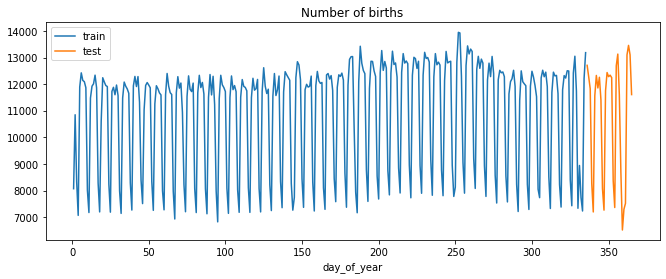

In [76]:
fig, ax = plt.subplots(figsize=(11, 4))
train['births'].plot(ax=ax, label='train')
test['births'].plot(ax=ax, label='test')
ax.set_title('Number of births')
ax.legend();

In [77]:
params = {
    'num_leaves': [7, 14, 21, 28, 31, 50],
    'learning_rate': [0.1, 0.03, 0.003],
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, scoring='r2', cv=5)
grid.fit(x_train, y_train)

grid.best_params_


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 7}

In [78]:
#lgb_model = lgb.LGBMRegressor(random_state=34).fit(x_train,y_train)

In [79]:

pred_y_test = grid.predict(x_test)

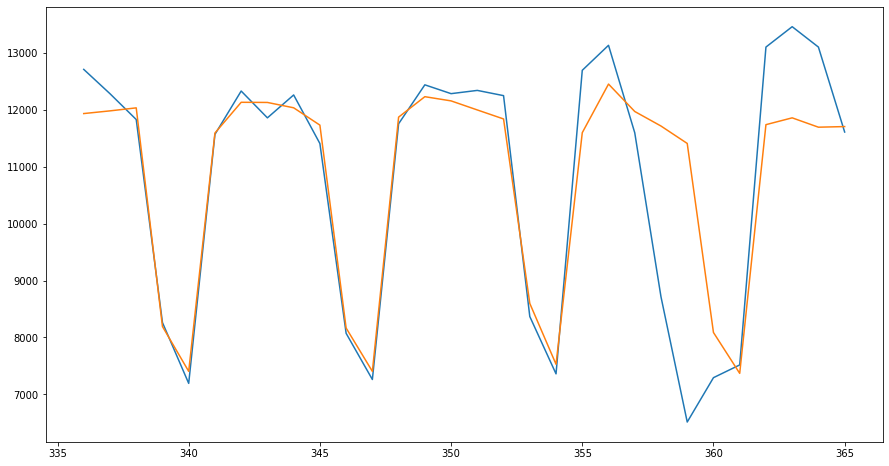

In [80]:
plt.figure(figsize=(15,8))
#plt.plot(data["births"])
plt.plot(x_test["day_of_year"],y_test)
plt.plot(x_test["day_of_year"],pred_y_test)

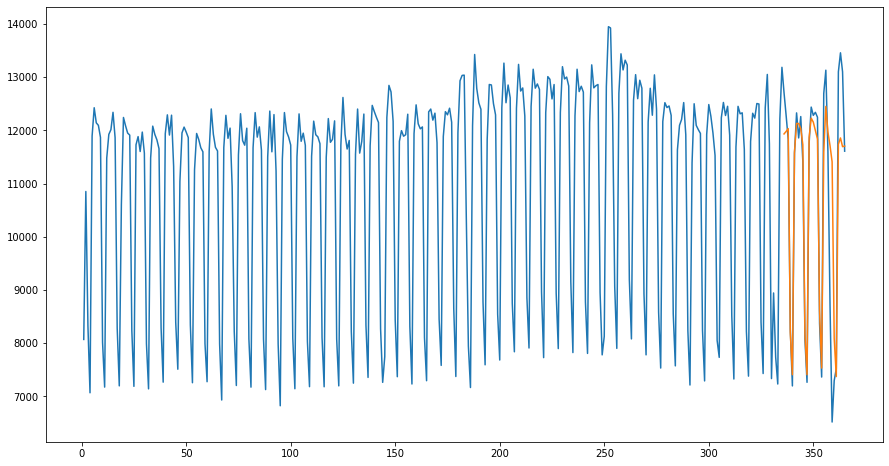

In [81]:
plt.figure(figsize=(15,8))
plt.plot(data["births"])
plt.plot(x_test["day_of_year"],pred_y_test)

In [82]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [83]:
MAPE(y_test,pred_y_test)

7.135688165509492